In [1]:
import os
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

In [2]:
dir_path = "../ferhan_simple_qa_rnn/data/SimpleQuestions_v2/freebase-subsets/"
data_path = os.path.join(dir_path, "freebase-FB2M.txt")

start = time.time()
df = pd.read_table(data_path, "\t", header=None, names=["mid", "relation", "object"])
finish = time.time()
print("time taken: {}s".format(finish-start))

time taken: 33.29059100151062s


In [3]:
df.describe()

,mid,relation,object
count,10843106,10843106,10843106
unique,1959820,6701,1065269
top,www.freebase.com/m/01xf7l,www.freebase.com/people/person/profession,www.freebase.com/m/05zppz
freq,2397,1762467,620472


In [4]:
% matplotlib inline

In [5]:
relation_counts = df['relation'].value_counts().reset_index().rename(columns={'index': 'relation', 'relation': 'count'})

The 10 most popular relations:

In [6]:
relation_counts.head(10)

,relation,count
0,www.freebase.com/people/person/profession,1762467
1,www.freebase.com/common/topic/notable_types,847059
2,www.freebase.com/people/person/gender,763480
3,www.freebase.com/people/person/nationality,599726
4,www.freebase.com/people/person/place_of_birth,577188
5,www.freebase.com/location/location/containedby,473626
6,www.freebase.com/people/deceased_person/place_...,160721
7,www.freebase.com/music/album/release_type,141996
8,www.freebase.com/film/film/genre,135957
9,www.freebase.com/music/release_track/recording,132254


The number of singleton relationships:

In [7]:
relation_counts[relation_counts['count'] == 1].count()

relation    998
count       998
dtype: int64

[Text(0,0.5,'Number of Relations with Count'), Text(0.5,0,'Count of Relation')]

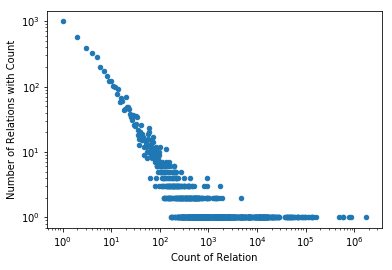

In [8]:
relation_plot = relation_counts.groupby('count').count().reset_index() \
    .rename(columns={'relation': 'count_of_count'}) \
    .plot(kind='scatter', x='count', y='count_of_count', logy=True, logx=True)

relation_plot.set(xlabel='Count of Relation', ylabel='Number of Relations with Count')

**Takeway:** fairly standard Zipfian distribution - lots singleton relations, a few relations that are _really_ popular

In [9]:
mid_counts = df['mid'].value_counts().reset_index().rename(columns={'index': 'mid', 'mid': 'count'})

The top 10 entities with the largest out-degree.

In [10]:
mid_counts.head(10)

,mid,count
0,www.freebase.com/m/01xf7l,2397
1,www.freebase.com/m/0dtfn,2244
2,www.freebase.com/m/09c7w0,1963
3,www.freebase.com/m/0y44,1872
4,www.freebase.com/m/012d40,1656
5,www.freebase.com/m/01vhpy,1584
6,www.freebase.com/m/02_286,1560
7,www.freebase.com/m/0f3m1,1560
8,www.freebase.com/m/03d6_gm,1520
9,www.freebase.com/m/025sf9q,1504


The number of entities that have only one outgoing edge:

In [11]:
mid_counts[mid_counts['count'] == 1].count()

mid      127568
count    127568
dtype: int64

[Text(0,0.5,'Number of mids with Out-degree'), Text(0.5,0,'Out-degree of mid')]

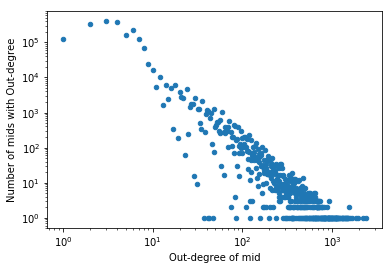

In [12]:
mid_plot = mid_counts.groupby('count').count().reset_index() \
    .rename(columns={'mid': 'count_of_count'}) \
    .plot(kind='scatter', x='count', y='count_of_count', logy=True, logx=True)

mid_plot.set(xlabel='Out-degree of mid', ylabel='Number of mids with Out-degree')